In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../_data/DataSet_Hitelbiralat_joados.csv')

In [4]:
df

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,19,M,S,21,0,NaN,Y,31,12,0,P,120,Y,Y,Y,Y,12,218,0.0,Y,N,0,ALBA,DENILSON,N,N,234.0,0,0,N,1
49996,49997,22,F,C,40,0,NaN,Y,31,1,0,P,120,Y,Y,Y,Y,72,717,0.0,Y,N,0,JOANA,INES,N,N,1500.0,0,0,N,1
49997,49998,23,F,S,23,0,NaN,Y,31,28,0,P,264,Y,Y,Y,Y,12,991,0.0,Y,N,0,NOVINA,GLAUCIA,N,N,240.0,0,0,N,0
49998,49999,9,F,C,38,0,NaN,Y,5,28,0,P,48,Y,Y,Y,Y,204,40,0.0,Y,N,0,LILIANE FIGUEIREDO,MIRNA CARVALHO NASCIMENTO,N,N,616.0,0,0,N,1


In [5]:
df['target'].value_counts()

1    40126
0     9874
Name: target, dtype: int64

In [6]:
# random baseline -> random model

In [7]:
np.random.seed(1)
df['pred_baseline_proba'] = np.random.rand(df.shape[0])

In [8]:
df['pred_baseline'] = df['pred_baseline_proba'].apply(lambda x: 1 if x >= 0.5 else 0)

In [9]:
accuracy_score(df['target'], df['pred_baseline'])

0.5034

In [10]:
recall_score(df['target'], df['pred_baseline'])

0.502865972187609

In [11]:
precision_score(df['target'], df['pred_baseline'])

0.8051875498802873

In [12]:
cm = confusion_matrix(df['target'], df['pred_baseline'])

In [13]:
(cm[0][0] + cm[1][1]) / cm.sum()

0.5034

In [14]:
# TN FP
# FN TP
# better -> pd.DataFrame(cm)
cm

array([[ 4992,  4882],
       [19948, 20178]])

In [15]:
(cm[0][0] + cm[1][1]) / cm.sum()

0.5034

In [16]:
cm[1][1] / cm[1].sum()

0.502865972187609

In [17]:
cm[1][1] / (cm[0][1] + cm[1][1])

0.8051875498802873

# adatelokeszites

In [18]:
dummy_cols_list = ['sex', 'marital_status', 'residence_type']
dummy_names = []

for col in dummy_cols_list:
    dummy_df = pd.get_dummies(df.loc[:, col], prefix=col, drop_first=True)
    dummy_names += dummy_df.columns.tolist()
    df = pd.concat([df, dummy_df], axis=1)

In [19]:
X_cols = ['age', 'months_in_residence', 'months_in_the_job', 'personal_net_income', 'mate_income']
X_cols = X_cols + dummy_names
y_col = 'target'

In [20]:
X = df.loc[:, X_cols]
y = df.loc[:, y_col]

In [21]:
X.isnull().sum()

age                    0
months_in_residence    0
months_in_the_job      0
personal_net_income    0
mate_income            0
sex_M                  0
marital_status_D       0
marital_status_O       0
marital_status_S       0
marital_status_V       0
residence_type_C       0
residence_type_O       0
residence_type_P       0
dtype: int64

In [22]:
model = LogisticRegression()

In [23]:
pred = cross_val_predict(model, X, y, cv=4)

In [24]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
df['pred_lr'] = pred

In [26]:
def get_results(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print('Acc:', round(acc, 4))
    print('Precision:', round(prec, 4))
    print('Recall:', round(rec, 4))
    print('CM:\n', cm)

In [27]:
get_results(y, pred)

Acc: 0.8025
Precision: 0.8025
Recall: 1.0
CM:
 [[    0  9874]
 [    1 40125]]


In [28]:
pred_proba = cross_val_predict(model, X, y, cv=4, method='predict_proba')

In [29]:
df['pred_lr_proba'] = pred_proba[:, 1]

In [30]:
df['pred_lr_proba']

0        0.855527
1        0.684468
2        0.707328
3        0.870089
4        0.750985
           ...   
49995    0.701530
49996    0.843666
49997    0.726458
49998    0.863089
49999    0.764721
Name: pred_lr_proba, Length: 50000, dtype: float64

In [31]:
df.groupby('target')['pred_lr_proba'].mean()

target
0    0.757217
1    0.795563
Name: pred_lr_proba, dtype: float64

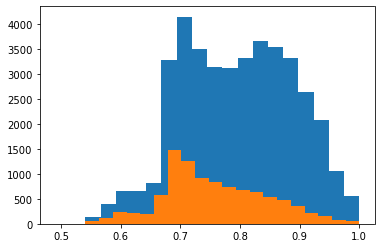

In [32]:
plt.hist(df.loc[df['target']==1, 'pred_lr_proba'], bins=20)
plt.hist(df.loc[df['target']==0, 'pred_lr_proba'], bins=20);

In [33]:
dct = DecisionTreeClassifier(max_depth=5)

In [34]:
pred = cross_val_predict(dct, X, y, cv=4)

In [35]:
pred_proba = cross_val_predict(dct, X, y, cv=4, method='predict_proba')

In [36]:
df['pred_dct_proba'] = pred_proba[:, 1]

In [37]:
get_results(y, pred)

Acc: 0.8026
Precision: 0.8032
Recall: 0.9988
CM:
 [[   56  9818]
 [   50 40076]]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
train_acc_list = []
test_acc_list = []
for i in range(1, 31):
    dct = DecisionTreeClassifier(max_depth=i)
    
    dct.fit(X_train, y_train)
    train_pred = dct.predict(X_train)
    test_pred = dct.predict(X_test)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    

(0.0, 1.0)

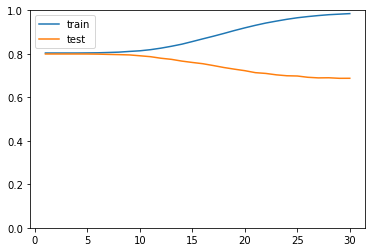

In [40]:
plt.plot(range(1, 31), train_acc_list, label='train')
plt.plot(range(1, 31), test_acc_list, label='test')
plt.legend()
plt.ylim(0, 1)

In [41]:
dct = DecisionTreeClassifier(max_depth=2)

In [42]:
dct.fit(X, y)

DecisionTreeClassifier(max_depth=2)

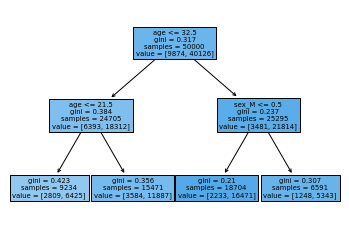

In [43]:
plot_tree(dct, feature_names=X.columns, filled=True);

In [44]:
np.random.rand()

0.43321705936162447

# Üzleti kiértékelés

In [45]:
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P,pred_lr,pred_lr_proba,pred_dct_proba
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1,1,0.855527,0.882179
1,2,15,F,S,18,0,NaN,Y,31,20,0,P,216,Y,Y,Y,Y,12,853,0.0,Y,N,0,SARA,FELIPE,N,N,300.0,0,0,N,1,0.720324,1,0,0,0,1,0,0,0,1,1,0.684468,0.702069
2,3,24,F,C,22,0,NaN,Y,31,8,0,P,48,Y,N,Y,Y,12,40,0.0,Y,N,0,HELENA,DOMINGOS SOGRA,N,N,229.0,0,0,N,1,0.000114,0,0,0,0,0,0,0,0,1,1,0.707328,0.749813
3,4,12,F,C,47,0,NaN,N,31,25,0,P,180,Y,Y,N,Y,24,35,0.0,Y,N,0,JACI,VALERIA ALEXANDRA TRAJANO,N,N,304.0,0,0,N,1,0.302333,0,0,0,0,0,0,0,0,1,1,0.870089,0.883823
4,5,16,F,S,28,0,NaN,Y,31,25,0,O,12,Y,Y,Y,Y,12,24,0.0,Y,N,0,MARCIA CRISTINA ZANELLA,SANDRO L P MARTINS,N,N,250.0,0,0,N,1,0.146756,0,0,0,0,1,0,0,1,0,1,0.750985,0.749813


In [46]:
df['profit'] = 0

df['profit'] = df['target'].apply(lambda x: 15000 if x == 1 else -100000)

In [47]:
df['profit'].value_counts()

 15000     40126
-100000     9874
Name: profit, dtype: int64

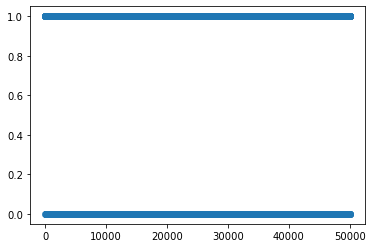

In [48]:
plt.scatter(df.index, df[y_col], alpha = 0.5)

In [49]:
df = df.sort_values('target', ascending=False).reset_index(drop=True)
df.head()

,id_client,id_shop,sex,marital_status,age,quant_dependants,education,flag_residencial_phone,area_code_residencial_phone,payment_day,shop_rank,residence_type,months_in_residence,flag_mothers_name,flag_fathers_name,flag_residence_town_working_town,flag_residence_state_working_state,months_in_the_job,profession_code,mate_income,flag_residencial_address_postal_address,flag_other_card,quant_banking_accounts,personal_reference_1,personal_reference_2,flag_mobile_phone,flag_contact_phone,personal_net_income,cod_application_booth,quant_additional_cards_in_the_application,flag_card_insurance_option,target,pred_baseline_proba,pred_baseline,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P,pred_lr,pred_lr_proba,pred_dct_proba,profit
0,1,22,F,O,44,0,NaN,N,31,12,0,P,12,Y,Y,N,Y,48,731,0.0,Y,N,0,VERA,LUCIA,N,N,300.0,0,0,N,1,0.417022,0,0,0,1,0,0,0,0,1,1,0.855527,0.882179,15000
1,31521,20,M,S,19,0,NaN,Y,31,12,0,C,24,Y,Y,Y,Y,36,40,0.0,Y,N,0,LIGIA MORAES RIBEIRO ALVE,IVONE MASSINE TOSTES,N,N,327.0,0,0,N,1,0.979518,1,1,0,0,1,0,1,0,0,1,0.691403,0.741100,15000
2,31507,15,F,S,20,0,NaN,Y,31,12,0,P,12,Y,Y,Y,Y,24,713,0.0,Y,N,0,MARIA,NaN,N,N,356.0,0,0,N,1,0.231254,0,0,0,0,1,0,0,0,1,1,0.694344,0.683465,15000
3,31509,16,F,C,46,0,NaN,Y,31,18,0,P,120,Y,Y,N,Y,12,24,0.0,Y,N,0,IVONE DA ROCHA,AUGUSTA DE SOUZA,N,N,220.0,0,0,N,1,0.657801,1,0,0,0,0,0,0,0,1,1,0.860859,0.874568,15000
4,31511,22,F,O,28,0,NaN,Y,31,28,0,A,12,Y,Y,N,Y,12,26,0.0,Y,N,0,RITA,NaN,N,N,300.0,0,0,N,1,0.914791,1,0,0,1,0,0,0,0,0,1,0.751236,0.758310,15000


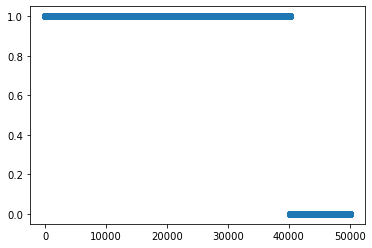

In [50]:
plt.scatter(df.index, df[y_col], alpha = 0.5)

In [51]:
df['profit_cumsum'] = df['profit'].cumsum()
df.loc[:, [y_col, 'profit', 'profit_cumsum']].head()

,target,profit,profit_cumsum
0,1,15000,15000
1,1,15000,30000
2,1,15000,45000
3,1,15000,60000
4,1,15000,75000


In [52]:
df.loc[:, [y_col, 'profit', 'profit_cumsum']].tail()

,target,profit,profit_cumsum
49995,0,-100000,-385110000
49996,0,-100000,-385210000
49997,0,-100000,-385310000
49998,0,-100000,-385410000
49999,0,-100000,-385510000


Text(0, 0.5, 'profit')

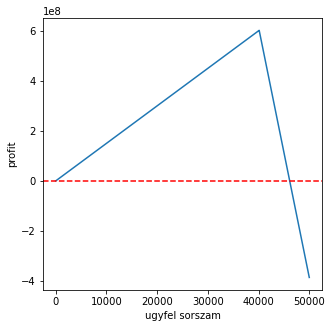

In [53]:
plt.figure(figsize=(5, 5))
plt.plot(df['profit'].cumsum())
plt.axhline(0, color='red', ls = '--')
plt.xlabel('ugyfel sorszam')
plt.ylabel('profit')

In [54]:
df.loc[df['profit_cumsum'] <= 0, ['profit', 'profit_cumsum', y_col]]

,profit,profit_cumsum,target
46144,-100000,-10000,0
46145,-100000,-110000,0
46146,-100000,-210000,0
46147,-100000,-310000,0
46148,-100000,-410000,0
...,...,...,...
49995,-100000,-385110000,0
49996,-100000,-385210000,0
49997,-100000,-385310000,0
49998,-100000,-385410000,0


In [55]:
df[y_col].value_counts()

1    40126
0     9874
Name: target, dtype: int64

In [56]:
df.loc[40125, [y_col, 'profit', 'profit_cumsum']]

target                   1
profit               15000
profit_cumsum    601890000
Name: 40125, dtype: object

Text(0, 0.5, 'jo ados valoszinuseg')

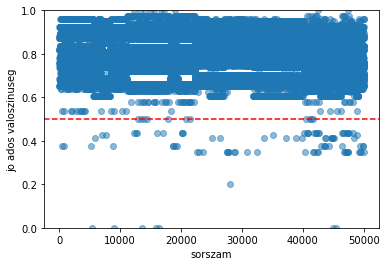

In [57]:
plt.scatter(df.index, df['pred_dct_proba'], alpha = 0.5)
plt.axhline(0.5, color = 'red', ls = '--')
plt.ylim(0, 1)
plt.xlabel('sorszam')
plt.ylabel('jo ados valoszinuseg')

In [58]:
df = df.sort_values('pred_dct_proba', ascending = False).reset_index(drop = True)

Text(0, 0.5, 'jo ados valoszinuseg')

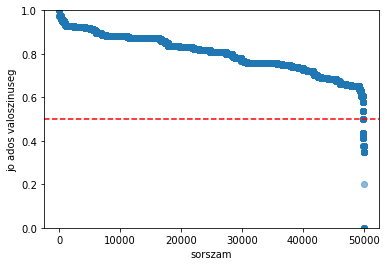

In [59]:
plt.scatter(df.index, df['pred_dct_proba'], alpha = 0.5)
plt.axhline(0.5, color = 'red', ls = '--')
plt.ylim(0, 1)
plt.xlabel('sorszam')
plt.ylabel('jo ados valoszinuseg')

In [60]:
def plot_profit_curve(df, sort_col):
    plot_df = df.sort_values(sort_col, ascending=False).reset_index(drop=True).copy()
    
    plt.plot(plot_df['profit'].cumsum(), label=sort_col)
    plt.axhline(0, color='red', ls = '--')
    plt.xlabel('ugyfel sorszam')
    plt.ylabel('profit')

    plt.legend()
    return 

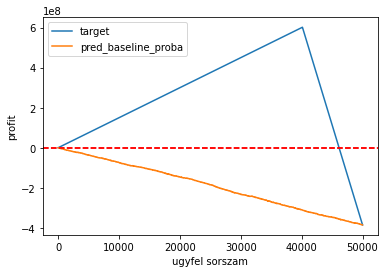

In [61]:
plot_profit_curve(df, y_col)

plot_profit_curve(df, 'pred_baseline_proba')

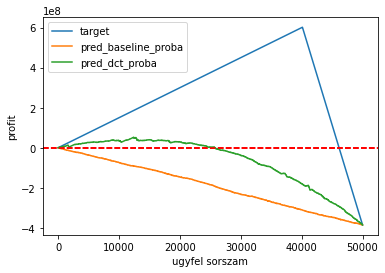

In [62]:
plot_profit_curve(df, y_col)

plot_profit_curve(df, 'pred_baseline_proba')

plot_profit_curve(df, 'pred_dct_proba')

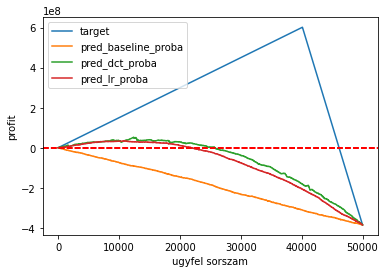

In [63]:
plot_profit_curve(df, y_col)

plot_profit_curve(df, 'pred_baseline_proba')

plot_profit_curve(df, 'pred_dct_proba')

plot_profit_curve(df, 'pred_lr_proba')

# K-NN

In [64]:
model = KNeighborsClassifier(n_neighbors = 15)

In [65]:
cross_val_predict(model, X, y, cv=4)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [66]:
cross_val_predict(model, X, y, cv=4, method = 'predict_proba')

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.2       , 0.8       ],
       [0.33333333, 0.66666667],
       [0.4       , 0.6       ],
       ...,
       [0.2       , 0.8       ],
       [0.13333333, 0.86666667],
       [0.26666667, 0.73333333]])

In [67]:
pred_proba = cross_val_predict(model, X, y, cv=4, method = 'predict_proba')
pred_proba[:, 1]

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.8       , 0.66666667, 0.6       , ..., 0.8       , 0.86666667,
       0.73333333])

In [68]:
df['pred_knn_proba'] = pred_proba[:, 1]

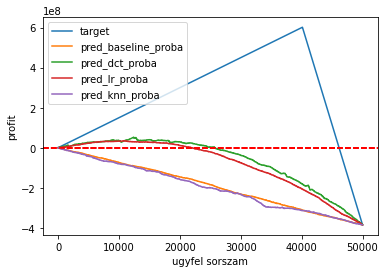

In [69]:
plot_profit_curve(df, y_col)

plot_profit_curve(df, 'pred_baseline_proba')

plot_profit_curve(df, 'pred_dct_proba')

plot_profit_curve(df, 'pred_lr_proba')

plot_profit_curve(df, 'pred_knn_proba')

In [70]:
X_cols

['age',
 'months_in_residence',
 'months_in_the_job',
 'personal_net_income',
 'mate_income',
 'sex_M',
 'marital_status_D',
 'marital_status_O',
 'marital_status_S',
 'marital_status_V',
 'residence_type_C',
 'residence_type_O',
 'residence_type_P']

In [71]:
df.loc[:, X_cols].describe()

,age,months_in_residence,months_in_the_job,personal_net_income,mate_income,sex_M,marital_status_D,marital_status_O,marital_status_S,marital_status_V,residence_type_C,residence_type_O,residence_type_P
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.684240,153.288000,50.600400,8.432965e+03,55.341441,0.304000,0.043080,0.05576,0.508440,0.048840,0.086860,0.040940,0.744620
std,13.076314,136.498105,73.890169,4.487915e+05,919.222986,0.459987,0.203039,0.22946,0.499934,0.215536,0.281633,0.198153,0.436079
min,15.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,36.000000,12.000000,2.700000e+02,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,120.000000,24.000000,4.000000e+02,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,43.000000,240.000000,60.000000,7.410000e+02,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1188.000000,1176.000000,3.852910e+07,150000.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
min_max_scaler = MinMaxScaler()

<AxesSubplot:>

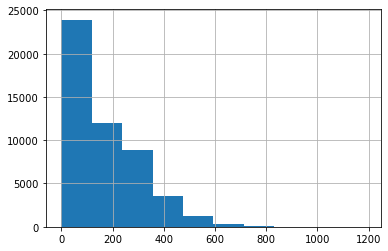

In [73]:
df['months_in_residence'].hist()

In [74]:
min_max_scaler.fit(df.loc[:, ['months_in_residence']])

scaled_months_in_residence = min_max_scaler.transform(df.loc[:, ['months_in_residence']])

In [75]:
df['min_max_scaled_months_in_residence'] = scaled_months_in_residence

<AxesSubplot:>

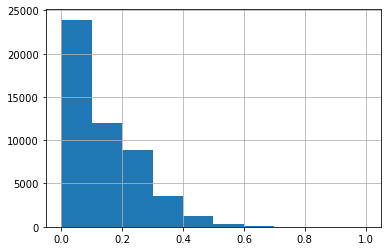

In [76]:
df['min_max_scaled_months_in_residence'].hist()

In [77]:
std_scaler = StandardScaler()

In [78]:
std_scaler.fit(df.loc[:, ['months_in_residence']])

scaled_months_in_residence = std_scaler.transform(df.loc[:, ['months_in_residence']])

In [79]:
df['std_scaled_months_in_residence'] = scaled_months_in_residence

<AxesSubplot:>

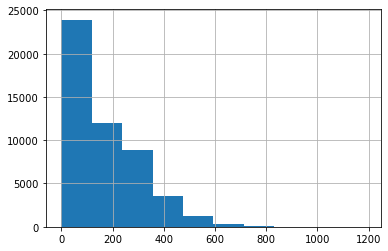

In [80]:
df['months_in_residence'].hist()

<AxesSubplot:>

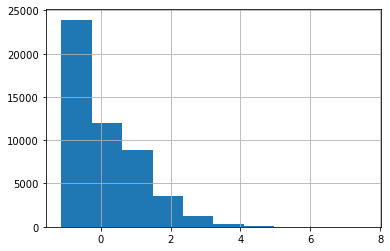

In [81]:
df['std_scaled_months_in_residence'].hist()

In [82]:
df['std_scaled_months_in_residence'].describe()

count    5.000000e+04
mean    -2.031387e-14
std      1.000010e+00
min     -1.123016e+00
25%     -8.592733e-01
50%     -2.438740e-01
75%      6.352679e-01
max      7.580489e+00
Name: std_scaled_months_in_residence, dtype: float64

In [83]:
def manual_cross_validate(df, scaler, result_col, X_cols, y_col):
    kfold = KFold(n_splits = 4)
    df[result_col] = 0
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        print('Hajtas:', i)
        print('Tanito adat:', train_idx)
        print('Teszt adat:', test_idx)
    
        knn = KNeighborsClassifier(n_neighbors = 15)
        
        X_train = df.loc[train_idx, X_cols]
        y_train = df.loc[train_idx, y_col]
        X_test = df.loc[test_idx, X_cols]
        y_test = df.loc[test_idx, y_col]
    
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
        knn.fit(X_train_scaled, y_train)
        pred_proba = knn.predict_proba(X_test_scaled)
    
        df.loc[test_idx, result_col] = pred_proba[:, 1]

    return df

In [84]:
df = manual_cross_validate(df, MinMaxScaler(), 'pred_knn_proba_min_scaled', X_cols, y_col)

Hajtas: 0
Tanito adat: [12500 12501 12502 ... 49997 49998 49999]
Teszt adat: [    0     1     2 ... 12497 12498 12499]
Hajtas: 1
Tanito adat: [    0     1     2 ... 49997 49998 49999]
Teszt adat: [12500 12501 12502 ... 24997 24998 24999]
Hajtas: 2
Tanito adat: [    0     1     2 ... 49997 49998 49999]
Teszt adat: [25000 25001 25002 ... 37497 37498 37499]
Hajtas: 3
Tanito adat: [    0     1     2 ... 37497 37498 37499]
Teszt adat: [37500 37501 37502 ... 49997 49998 49999]


In [85]:
df = manual_cross_validate(df, StandardScaler(), 'pred_knn_proba_std_scaled', X_cols, y_col)

Hajtas: 0
Tanito adat: [12500 12501 12502 ... 49997 49998 49999]
Teszt adat: [    0     1     2 ... 12497 12498 12499]
Hajtas: 1
Tanito adat: [    0     1     2 ... 49997 49998 49999]
Teszt adat: [12500 12501 12502 ... 24997 24998 24999]
Hajtas: 2
Tanito adat: [    0     1     2 ... 49997 49998 49999]
Teszt adat: [25000 25001 25002 ... 37497 37498 37499]
Hajtas: 3
Tanito adat: [    0     1     2 ... 37497 37498 37499]
Teszt adat: [37500 37501 37502 ... 49997 49998 49999]


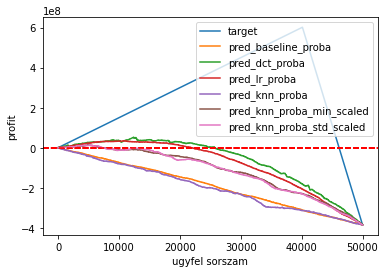

In [86]:
plot_profit_curve(df, y_col)

plot_profit_curve(df, 'pred_baseline_proba')

plot_profit_curve(df, 'pred_dct_proba')

plot_profit_curve(df, 'pred_lr_proba')

plot_profit_curve(df, 'pred_knn_proba')

plot_profit_curve(df, 'pred_knn_proba_min_scaled')

plot_profit_curve(df, 'pred_knn_proba_std_scaled')

# Multiclass osztályozás

# 1. Adatok beolvasása

In [87]:
df = pd.read_csv('../_data/DataSet_student-mat.csv')

In [88]:
df.shape

(395, 33)

In [89]:
pd.set_option('display.max_columns', None)

In [90]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**Mit jelentenek az attribútumok?**
> - school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
> - sex - student's sex (binary: 'F' - female or 'M' - male)
> - age - student's age (numeric: from 15 to 22)
> - address - student's home address type (binary: 'U' - urban or 'R' - rural)
> - famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
> - Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
> - Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 “ 5th to 9th grade, 3 “ secondary education or 4 “ higher education)
> - Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 “ 5th to 9th grade, 3 “ secondary education or 4 “ higher education)
> - Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
> - Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
> - reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
> - guardian - student's guardian (nominal: 'mother', 'father' or 'other')
> - traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
> - studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
> - failures - number of past class failures (numeric: n if 1<=n<3, else 4)
> - schoolsup - extra educational support (binary: yes or no)
> - famsup - family educational support (binary: yes or no)
> - paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
> - activities - extra-curricular activities (binary: yes or no)
> - nursery - attended nursery school (binary: yes or no)
> - higher - wants to take higher education (binary: yes or no)
> - internet - Internet access at home (binary: yes or no)
> - romantic - with a romantic relationship (binary: yes or no)
> - famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
> - freetime - free time after school (numeric: from 1 - very low to 5 - very high)
> - goout - going out with friends (numeric: from 1 - very low to 5 - very high)
> - Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
> - Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
> - health - current health status (numeric: from 1 - very bad to 5 - very good)
> - absences - number of school absences (numeric: from 0 to 93)

# 2. Adatelőkészítés

In [91]:
def point_to_grade(point):
    if point <= 10:
        return 1
    elif point <= 14:
        return 2
    elif point <= 16:
        return 3
    elif point <= 18:
        return 4
    else:
        return 5

In [92]:
df['grade'] = df['G3'].apply(lambda x: point_to_grade(x))

In [93]:
y_col = 'grade'
X_cols = ['goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

In [94]:
X = df.loc[:, X_cols]

In [95]:
y = df.loc[:, y_col]

# 3. Modellezés

## 3.1 Döntési fa

In [96]:
dec_tree = DecisionTreeClassifier(random_state = 42)

pred = cross_val_predict(dec_tree, X, y, cv = 4)
df['pred_dct'] = pred
accuracy_score(y, pred)

0.8253164556962025

## 3.2 K-NN

In [97]:
kfold = KFold(n_splits = 4)
df['pred_knn'] = 0

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    knn = KNeighborsClassifier(n_neighbors = 5)
    
    X_train = df.loc[train_idx, X_cols]
    y_train = df.loc[train_idx, y_col]
    X_test = df.loc[test_idx, X_cols]
    y_test = df.loc[test_idx, y_col]

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)

    df.loc[test_idx, 'pred_knn'] = pred

In [98]:
accuracy_score(y, df.loc[:, 'pred_knn'])

0.7265822784810126

# 4. Értékelés

In [99]:
df['dec_tree_error'] = 0
df.loc[df[y_col] != df['pred_dct'], 'dec_tree_error'] = 1

In [100]:
df['knn_error'] = 0
df.loc[df[y_col] != df['pred_knn'], 'knn_error'] = 1 

In [101]:
df.groupby(y_col)['dec_tree_error'].sum() / df[y_col].value_counts()

grade
1    0.123656
2    0.183824
3    0.244898
4    0.333333
5    0.500000
dtype: float64

In [102]:
df.groupby(y_col)['knn_error'].sum() / df[y_col].value_counts()

grade
1    0.118280
2    0.257353
3    0.653061
4    0.722222
5    1.000000
dtype: float64

In [103]:
df.loc[df[y_col] == 5, [y_col, 'pred_dct', 'pred_knn']]

,grade,pred_dct,pred_knn
8,5,4,3
47,5,5,4
110,5,5,4
113,5,5,4
286,5,4,3
374,5,4,3


In [104]:
df[y_col].value_counts()

1    186
2    136
3     49
4     18
5      6
Name: grade, dtype: int64

In [105]:
pd.DataFrame(confusion_matrix(df.loc[:, y_col], df.loc[:, 'pred_dct']), index = range(1, 6), columns = range(1, 6))

,1,2,3,4,5
1,163,22,1,0,0
2,17,111,8,0,0
3,0,7,37,5,0
4,0,0,2,12,4
5,0,0,0,3,3


In [106]:
pd.DataFrame(confusion_matrix(df.loc[:, y_col], df.loc[:, 'pred_knn']), index = range(1, 6), columns = range(1, 6))

,1,2,3,4,5
1,164,22,0,0,0
2,26,101,9,0,0
3,0,31,17,1,0
4,0,4,8,5,1
5,0,0,3,3,0
